# Lab | Cleaning categorical data

In [675]:
# 1. Import the necessary libraries if you are starting a new notebook.

In [676]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [677]:
# 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv()

In [678]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [679]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [680]:
# 3. What should we do with the customer_id column?

In [681]:
# Customer_id is a categorical column that has too many categories and the model doesn't really need the information in this column, We could drop the column or not use it. 

In [682]:
customer_df = customer_df.drop('Customer', axis=1)

In [683]:
# 4. Load the continuous and discrete variables into numericals_df and categorical_df variables:

In [684]:
numerical_df = customer_df.select_dtypes(include='number')

In [685]:
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [686]:
categorical_df = customer_df.select_dtypes(include='object')

In [687]:
categorical_df

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [688]:
# 5. Plot every categorical variable.

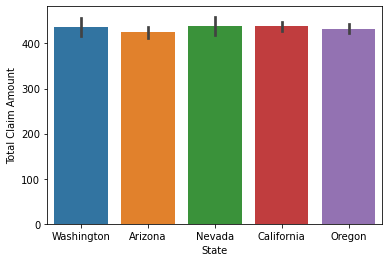

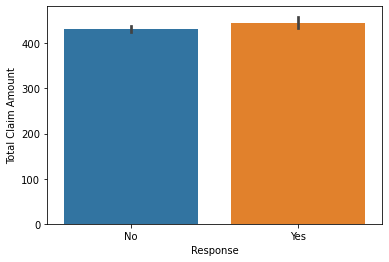

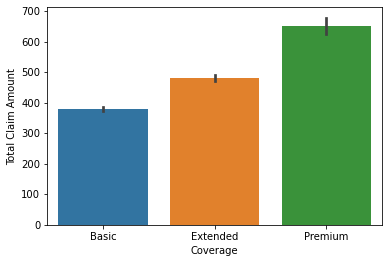

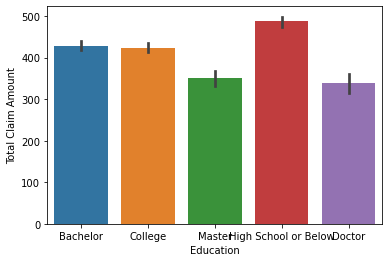

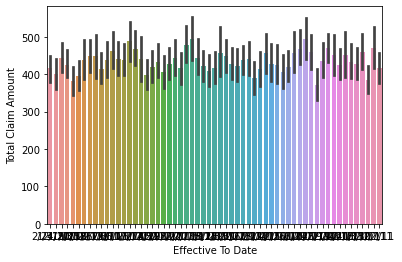

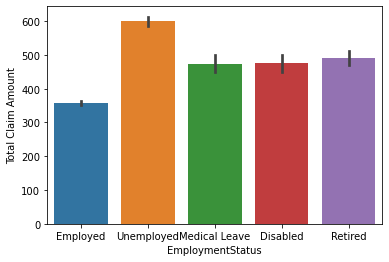

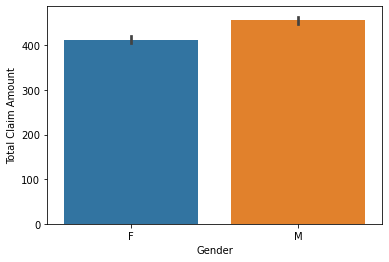

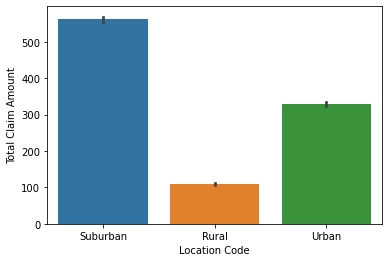

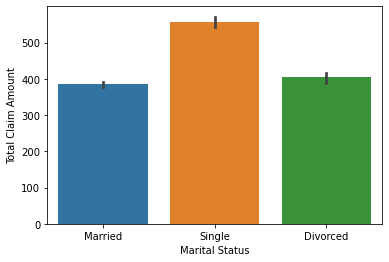

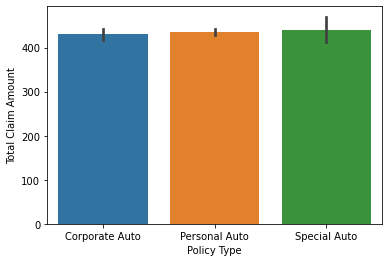

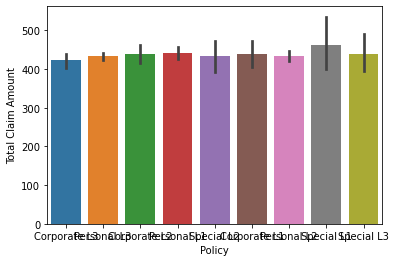

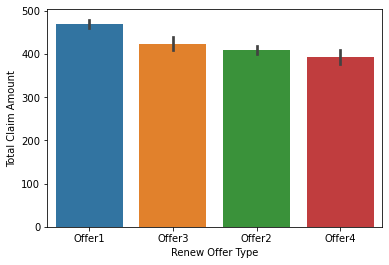

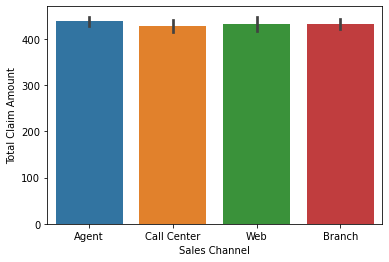

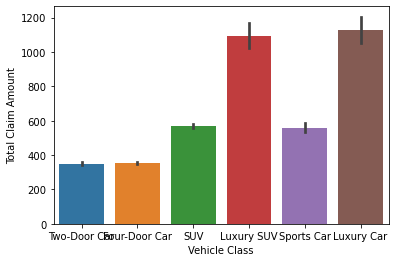

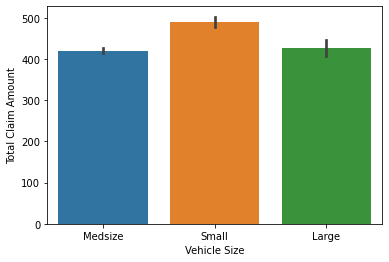

In [689]:
for column in customer_df.select_dtypes(np.object).columns: 
    sns.barplot(x=column, y="Total Claim Amount", data=customer_df )
    plt.show()

In [690]:
# I don't know which is the target variable, I did it as if it was Total Claim Amount

In [691]:
# 6. For the categorical data, check if there is any data cleaning that need to perform.

In [692]:
for col in customer_df.select_dtypes('object'):
    print(customer_df[col].value_counts(), '\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 

No     7826
Yes    1308
Name: Response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11  

In [693]:
# Maybe for the variable Policy we could bucket the category Special, as we have few values and the 3 Special categories by themself will not really add much information to the model.  

In [694]:
categories = pd.DataFrame(customer_df['Policy'].value_counts())
categories.columns = ['Policy']
categories

,Policy
Personal L3,3426
Personal L2,2122
Personal L1,1240
Corporate L3,1014
Corporate L2,595
Corporate L1,359
Special L2,164
Special L3,148
Special L1,66


In [695]:
group_Policy = categories[categories['Policy'] < 200].index
group_Policy

Index(['Special L2', 'Special L3', 'Special L1'], dtype='object')

In [696]:
def Policy_bucket(x):
    if x in group_Policy:
        return 'Special'
    else:
        return x

In [697]:
customer_df['Policy'] = customer_df['Policy'].apply(Policy_bucket)

In [698]:
pd.DataFrame(customer_df['Policy'].value_counts())

,Policy
Personal L3,3426
Personal L2,2122
Personal L1,1240
Corporate L3,1014
Corporate L2,595
Special,378
Corporate L1,359


In [699]:
# For the moment, I wouldn't bucket any other variable. 

# Lab | Feature extraction


In [700]:
# 1. Open the categoricals variable we created before.

In [701]:
categorical_df

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [702]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [703]:
# 2. Plot all the categorical variables with the proper plot. What can you see?

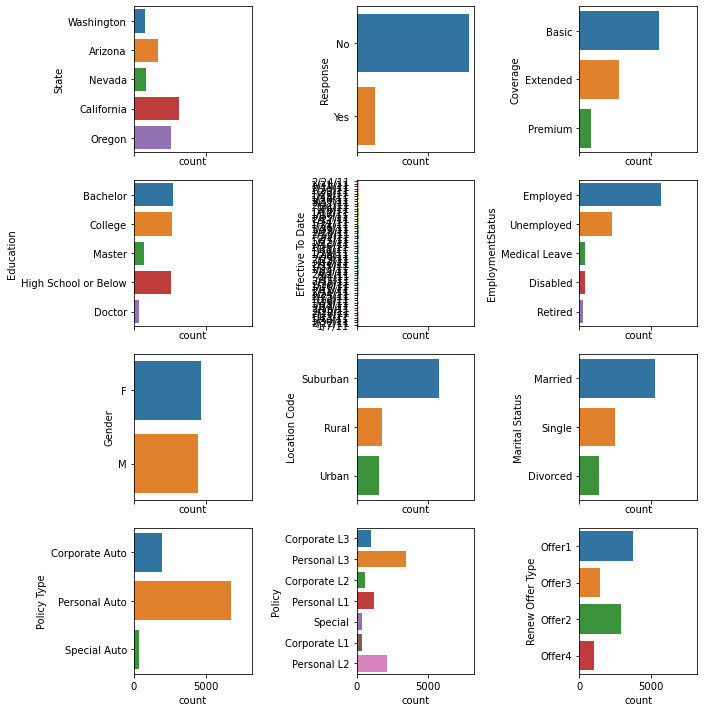

In [704]:
fig, axes =plt.subplots(4,3, figsize=(10,10), sharex=True)
axes = axes.flatten()
object_bol = customer_df.dtypes == 'object'
for ax, catplot in zip(axes, customer_df.dtypes[object_bol].index):
    sns.countplot(y=catplot, data=customer_df, ax=ax,)

plt.tight_layout()  
plt.show()

In [705]:
# With these graphs I can see the count of each category for all the variables. We can see this plot doesn't work for the variable effective to date.  

In [706]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [707]:
# I don't think there is any column redundant I should get rid of, for the moment I will keep all the columns for my model. 

In [708]:
# 4. Plot time variable. Can you extract something from it?

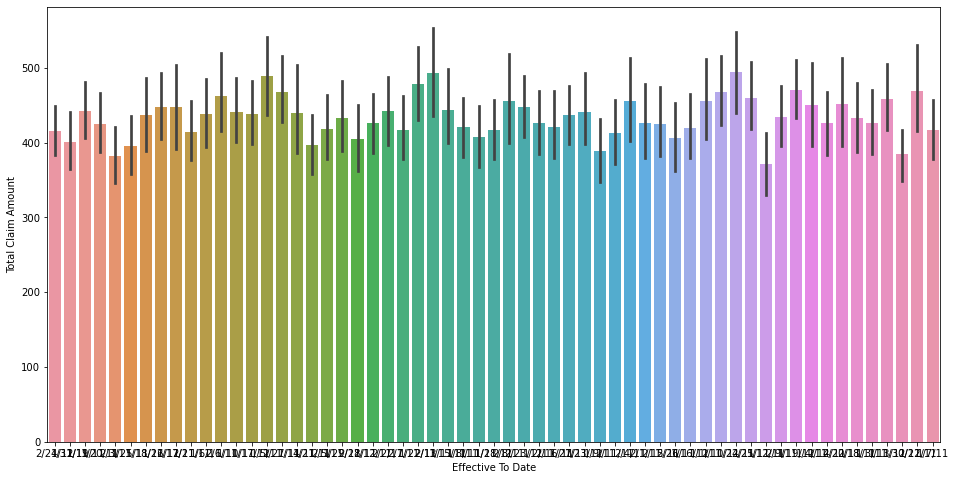

In [709]:
plt.figure(figsize=(16,8))

sns.barplot(x='Effective To Date', y="Total Claim Amount", data=customer_df) 
plt.show()

In [710]:
#The plot of the time variable Effective to Date doesn't really work, it doesn't provide us clear information. 

# Lab | Data cleaning and wrangling

In [711]:
# 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

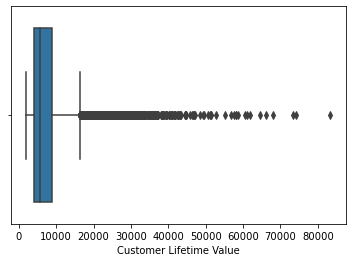

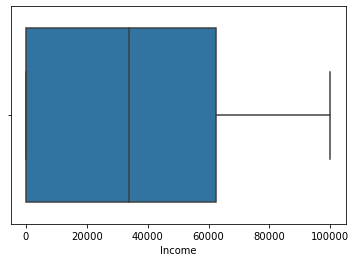

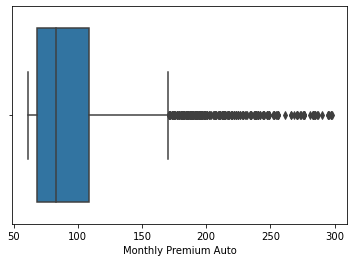

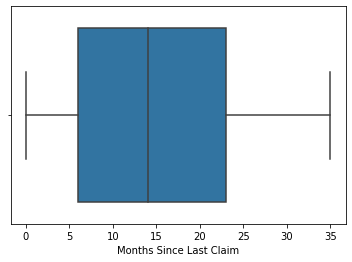

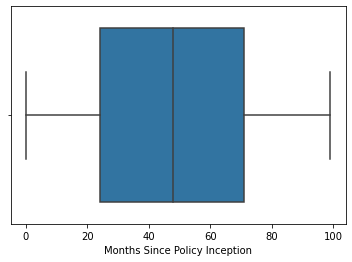

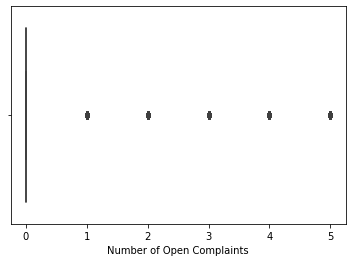

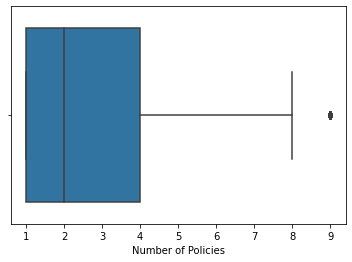

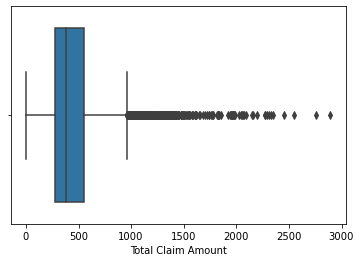

In [712]:
for column in customer_df.select_dtypes(np.number).columns: 
    sns.boxplot(customer_df[column])
    plt.show()

In [713]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [714]:
# I see Total Claim Amount has some outliers, I could drop outliers above 2500. 

In [715]:
customer_df[customer_df['Total Claim Amount'] > 2500]

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
888,Arizona,8581.278701,No,Extended,Bachelor,1/18/11,Medical Leave,M,27689,Suburban,Married,239,0,72,2,1,Personal Auto,Personal L2,Offer2,Web,2893.239678,Luxury SUV,Medsize
4930,Nevada,43217.216110,No,Extended,High School or Below,1/27/11,Employed,M,51504,Suburban,Single,220,30,99,0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Luxury SUV,Medsize
5074,Nevada,9295.411150,No,Premium,High School or Below,2/14/11,Unemployed,M,0,Suburban,Single,261,33,44,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize


In [716]:
#it's just 3 rows

In [717]:
#I won't remove those rows yet, maybe if in the future we scalate the data it won't be necessary to drop values. 

In [718]:
# 2. Create a copy of the dataframe for the data wrangling.

In [719]:
data_copy = customer_df.copy()

In [720]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [721]:
# 3. Normalize the continuous variables. You can use any one method you want.

In [722]:
from sklearn.preprocessing import MinMaxScaler

numericals = data_copy.select_dtypes(np.number)

transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.        ,
        0.13297388],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 0.875     ,
        0.39105113],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.        , 0.125     ,
        0.19576416],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.6       , 0.125     ,
        0.27329676],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.25      ,
        0.2388757 ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.        ,
        0.12771622]])

In [723]:
# 4. Encode the categorical variables

In [724]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [725]:
data_copy["Coverage"] = data_copy["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [726]:
enc = OrdinalEncoder()
enc.fit(data_copy[["EmploymentStatus", "Location Code", "Vehicle Size"]])
data_copy[["EmploymentStatus", "Location Code","Vehicle Size"]] = enc.transform(data_copy[["EmploymentStatus", "Location Code","Vehicle Size"]])

In [727]:
from sklearn.preprocessing import OneHotEncoder

In [728]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,0,Bachelor,2/24/11,1.0,F,56274,1.0,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1.0
1,Arizona,6979.535903,No,1,Bachelor,1/31/11,4.0,F,0,1.0,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1.0
2,Nevada,12887.431650,No,2,Bachelor,2/19/11,1.0,F,48767,1.0,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1.0
3,California,7645.861827,No,0,Bachelor,1/20/11,4.0,M,0,1.0,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,1.0
4,Washington,2813.692575,No,0,Bachelor,2/3/11,1.0,M,43836,0.0,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,0,Bachelor,2/10/11,1.0,M,71941,2.0,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,1.0
9130,California,3096.511217,Yes,1,College,2/12/11,1.0,F,21604,1.0,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,1.0
9131,California,8163.890428,No,1,Bachelor,2/6/11,4.0,M,0,1.0,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,1.0
9132,California,7524.442436,No,1,College,2/3/11,1.0,M,21941,1.0,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,0.0


In [729]:

one_hot_encoder = OneHotEncoder(sparse=False)
data_copy["State","Marital Status", "Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"] = one_hot_encoder.fit_transform(data_copy["State","Marital Status", "Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"].values.reshape(-1,1))


KeyError: ('State', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class')

In [730]:
encoder = OneHotEncoder() 
encoder.fit_transform(data_copy[["State","Marital Status", "Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"]])

<9134x32 sparse matrix of type '<class 'numpy.float64'>'
	with 63938 stored elements in Compressed Sparse Row format>

In [731]:
encoded = encoder.transform(data_copy[["State","Marital Status", "Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"]]).toarray()

In [732]:
data_copy[["State","Marital Status", "Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"]] = encoder.fit_transform(data_copy[["State","Marital Status", "Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"]])

ValueError: Columns must be same length as key

In [ ]:
# I have tried to use the One Hot Encoder but I can't make it work, so I have decided I will use the Lable Encoder

In [733]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,0,Bachelor,2/24/11,1.0,F,56274,1.0,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1.0
1,Arizona,6979.535903,No,1,Bachelor,1/31/11,4.0,F,0,1.0,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1.0
2,Nevada,12887.431650,No,2,Bachelor,2/19/11,1.0,F,48767,1.0,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1.0
3,California,7645.861827,No,0,Bachelor,1/20/11,4.0,M,0,1.0,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,1.0
4,Washington,2813.692575,No,0,Bachelor,2/3/11,1.0,M,43836,0.0,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,0,Bachelor,2/10/11,1.0,M,71941,2.0,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,1.0
9130,California,3096.511217,Yes,1,College,2/12/11,1.0,F,21604,1.0,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,1.0
9131,California,8163.890428,No,1,Bachelor,2/6/11,4.0,M,0,1.0,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,1.0
9132,California,7524.442436,No,1,College,2/3/11,1.0,M,21941,1.0,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,0.0


In [734]:
from sklearn.preprocessing import LabelEncoder

In [735]:
le = LabelEncoder()
data_copy['State']= le.fit_transform(data_copy['State'])

In [736]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,No,0,Bachelor,2/24/11,1.0,F,56274,1.0,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1.0
1,0,6979.535903,No,1,Bachelor,1/31/11,4.0,F,0,1.0,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1.0
2,2,12887.431650,No,2,Bachelor,2/19/11,1.0,F,48767,1.0,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1.0
3,1,7645.861827,No,0,Bachelor,1/20/11,4.0,M,0,1.0,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,1.0
4,4,2813.692575,No,0,Bachelor,2/3/11,1.0,M,43836,0.0,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,No,0,Bachelor,2/10/11,1.0,M,71941,2.0,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,1.0
9130,1,3096.511217,Yes,1,College,2/12/11,1.0,F,21604,1.0,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,1.0
9131,1,8163.890428,No,1,Bachelor,2/6/11,4.0,M,0,1.0,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,1.0
9132,1,7524.442436,No,1,College,2/3/11,1.0,M,21941,1.0,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,0.0


In [737]:

data_copy['Marital Status']= le.fit_transform(data_copy['Marital Status']) 

In [738]:
data_copy['Policy Type']= le.fit_transform(data_copy['Policy Type']) 

In [739]:
data_copy['Policy']= le.fit_transform(data_copy['Policy']) 

In [740]:
data_copy['Renew Offer Type']= le.fit_transform(data_copy['Renew Offer Type']) 

In [741]:
data_copy['Sales Channel']= le.fit_transform(data_copy['Sales Channel']) 

In [742]:
data_copy['Vehicle Class']= le.fit_transform(data_copy['Vehicle Class']) 

In [743]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,No,0,Bachelor,2/24/11,1.0,F,56274,1.0,1,69,32,5,0,1,0,2,0,0,384.811147,5,1.0
1,0,6979.535903,No,1,Bachelor,1/31/11,4.0,F,0,1.0,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1.0
2,2,12887.431650,No,2,Bachelor,2/19/11,1.0,F,48767,1.0,1,108,18,38,0,2,1,5,0,0,566.472247,5,1.0
3,1,7645.861827,No,0,Bachelor,1/20/11,4.0,M,0,1.0,1,106,18,65,0,7,0,1,0,2,529.881344,3,1.0
4,4,2813.692575,No,0,Bachelor,2/3/11,1.0,M,43836,0.0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,No,0,Bachelor,2/10/11,1.0,M,71941,2.0,1,73,18,89,0,2,1,3,1,3,198.234764,0,1.0
9130,1,3096.511217,Yes,1,College,2/12/11,1.0,F,21604,1.0,0,79,14,28,0,1,0,2,0,1,379.200000,0,1.0
9131,1,8163.890428,No,1,Bachelor,2/6/11,4.0,M,0,1.0,2,85,9,37,3,2,0,1,0,1,790.784983,0,1.0
9132,1,7524.442436,No,1,College,2/3/11,1.0,M,21941,1.0,1,96,34,3,0,3,1,4,2,1,691.200000,0,0.0


In [744]:
# 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [745]:
data_copy['Month_eff.to_date'] = pd.DatetimeIndex(data_copy['Effective To Date']).month

In [746]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month_eff.to_date
0,4,2763.519279,No,0,Bachelor,2/24/11,1.0,F,56274,1.0,1,69,32,5,0,1,0,2,0,0,384.811147,5,1.0,2
1,0,6979.535903,No,1,Bachelor,1/31/11,4.0,F,0,1.0,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1.0,1
2,2,12887.431650,No,2,Bachelor,2/19/11,1.0,F,48767,1.0,1,108,18,38,0,2,1,5,0,0,566.472247,5,1.0,2
3,1,7645.861827,No,0,Bachelor,1/20/11,4.0,M,0,1.0,1,106,18,65,0,7,0,1,0,2,529.881344,3,1.0,1
4,4,2813.692575,No,0,Bachelor,2/3/11,1.0,M,43836,0.0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,No,0,Bachelor,2/10/11,1.0,M,71941,2.0,1,73,18,89,0,2,1,3,1,3,198.234764,0,1.0,2
9130,1,3096.511217,Yes,1,College,2/12/11,1.0,F,21604,1.0,0,79,14,28,0,1,0,2,0,1,379.200000,0,1.0,2
9131,1,8163.890428,No,1,Bachelor,2/6/11,4.0,M,0,1.0,2,85,9,37,3,2,0,1,0,1,790.784983,0,1.0,2
9132,1,7524.442436,No,1,College,2/3/11,1.0,M,21941,1.0,1,96,34,3,0,3,1,4,2,1,691.200000,0,0.0,2


In [747]:
data_copy['Day_week_eff.to_date'] = pd.DatetimeIndex(data_copy['Effective To Date']).weekday

In [748]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month_eff.to_date,Day_week_eff.to_date
0,4,2763.519279,No,0,Bachelor,2/24/11,1.0,F,56274,1.0,1,69,32,5,0,1,0,2,0,0,384.811147,5,1.0,2,3
1,0,6979.535903,No,1,Bachelor,1/31/11,4.0,F,0,1.0,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1.0,1,0
2,2,12887.431650,No,2,Bachelor,2/19/11,1.0,F,48767,1.0,1,108,18,38,0,2,1,5,0,0,566.472247,5,1.0,2,5
3,1,7645.861827,No,0,Bachelor,1/20/11,4.0,M,0,1.0,1,106,18,65,0,7,0,1,0,2,529.881344,3,1.0,1,3
4,4,2813.692575,No,0,Bachelor,2/3/11,1.0,M,43836,0.0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,No,0,Bachelor,2/10/11,1.0,M,71941,2.0,1,73,18,89,0,2,1,3,1,3,198.234764,0,1.0,2,3
9130,1,3096.511217,Yes,1,College,2/12/11,1.0,F,21604,1.0,0,79,14,28,0,1,0,2,0,1,379.200000,0,1.0,2,5
9131,1,8163.890428,No,1,Bachelor,2/6/11,4.0,M,0,1.0,2,85,9,37,3,2,0,1,0,1,790.784983,0,1.0,2,6
9132,1,7524.442436,No,1,College,2/3/11,1.0,M,21941,1.0,1,96,34,3,0,3,1,4,2,1,691.200000,0,0.0,2,3


In [749]:
# 6.Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [750]:
data_copy['Response']= le.fit_transform(data_copy['Response']) 

In [751]:
data_copy['Education']= le.fit_transform(data_copy['Education']) 

In [752]:
data_copy['Gender']= le.fit_transform(data_copy['Gender']) 

In [753]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month_eff.to_date,Day_week_eff.to_date
0,4,2763.519279,0,0,0,2/24/11,1.0,0,56274,1.0,1,69,32,5,0,1,0,2,0,0,384.811147,5,1.0,2,3
1,0,6979.535903,0,1,0,1/31/11,4.0,0,0,1.0,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1.0,1,0
2,2,12887.431650,0,2,0,2/19/11,1.0,0,48767,1.0,1,108,18,38,0,2,1,5,0,0,566.472247,5,1.0,2,5
3,1,7645.861827,0,0,0,1/20/11,4.0,1,0,1.0,1,106,18,65,0,7,0,1,0,2,529.881344,3,1.0,1,3
4,4,2813.692575,0,0,0,2/3/11,1.0,1,43836,0.0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,0,0,0,2/10/11,1.0,1,71941,2.0,1,73,18,89,0,2,1,3,1,3,198.234764,0,1.0,2,3
9130,1,3096.511217,1,1,1,2/12/11,1.0,0,21604,1.0,0,79,14,28,0,1,0,2,0,1,379.200000,0,1.0,2,5
9131,1,8163.890428,0,1,0,2/6/11,4.0,1,0,1.0,2,85,9,37,3,2,0,1,0,1,790.784983,0,1.0,2,6
9132,1,7524.442436,0,1,1,2/3/11,1.0,1,21941,1.0,1,96,34,3,0,3,1,4,2,1,691.200000,0,0.0,2,3


In [754]:
data_copy = data_copy.drop('Effective To Date', axis=1)

In [755]:
data_copy

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month_eff.to_date,Day_week_eff.to_date
0,4,2763.519279,0,0,0,1.0,0,56274,1.0,1,69,32,5,0,1,0,2,0,0,384.811147,5,1.0,2,3
1,0,6979.535903,0,1,0,4.0,0,0,1.0,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1.0,1,0
2,2,12887.431650,0,2,0,1.0,0,48767,1.0,1,108,18,38,0,2,1,5,0,0,566.472247,5,1.0,2,5
3,1,7645.861827,0,0,0,4.0,1,0,1.0,1,106,18,65,0,7,0,1,0,2,529.881344,3,1.0,1,3
4,4,2813.692575,0,0,0,1.0,1,43836,0.0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,0,0,0,1.0,1,71941,2.0,1,73,18,89,0,2,1,3,1,3,198.234764,0,1.0,2,3
9130,1,3096.511217,1,1,1,1.0,0,21604,1.0,0,79,14,28,0,1,0,2,0,1,379.200000,0,1.0,2,5
9131,1,8163.890428,0,1,0,4.0,1,0,1.0,2,85,9,37,3,2,0,1,0,1,790.784983,0,1.0,2,6
9132,1,7524.442436,0,1,1,1.0,1,21941,1.0,1,96,34,3,0,3,1,4,2,1,691.200000,0,0.0,2,3


# Lab | Comparing regression models

In [756]:
# 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [757]:
from sklearn.model_selection import train_test_split

In [758]:
X = data_copy.drop('Total Claim Amount', axis=1)
y = data_copy['Total Claim Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [759]:
# 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [760]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [761]:
# start the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [762]:
#predictions
predictions = model.predict(X_test)

In [763]:
# metrics
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.6012628451010376, 130.32031151423595, 178.05618826399973)

In [764]:
# 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [793]:
def train_and_test_models(model_list):
  for model in model_list:
    # train the model
    model.fit(X_train, y_train)
    
    # make predictions on the validation data
    predictions = model.predict(X_test)
    
    # test the model
    r2= r2_score(y_test, predictions)
    mean_abs_error = mean_absolute_error(y_test, predictions)
    mean_sq_error = mean_squared_error(y_test, predictions, squared=False)
    
    print(r2)
    print(mean_abs_error)
    print(mean_sq_error)

In [380]:
# 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [797]:
from sklearn.linear_model import LinearRegression

#The LinearRegression model
model_list = [LinearRegression()]

# call the function to train and test the model
train_and_test_models(model_list)


0.6012628451010376
130.32031151423595
178.05618826399973


In [796]:

model_list = [KNeighborsRegressor()]

train_and_test_models(model_list)


0.22911057111905886
169.71508072260536
247.57669681897093


In [798]:
# 5. You can check also the MLPRegressor for this task!

In [799]:
from sklearn.neural_network import MLPRegressor

In [800]:
model_list = [MLPRegressor()]

train_and_test_models(model_list)

0.49275845895034887
143.5727776120549
200.82654916593634


In [801]:
# 6. Check and discuss the results.

In [ ]:
# We can see that the model that has better metrics for the predictions is the Linear regression model, as it haves the highest R2 score and the lowest mean absolute and squared errors. The second best is the MLP Regressor and the worst one is the KNeighbours Regressor. 